In [29]:
# Sample Tensorflow.js project. Using CNN on MNIST dataset

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import backend as K
import numpy as np

In [31]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [32]:
# Unlike Keras example, we can use 28*28 pixel images as they are.
# We're using 1*28*28 as it's greyscale. If colour, use 3 for red,green,blue
if K.image_data_format() == 'channels_first':
  trainImages = mnist_train_images.reshape(mnist_train_images.shape[0],1,28,28)
  testImages = mnist_test_images.reshape(mnist_test_images.shape[0],1,28,28)
  inputShape = (1,28,28)
else:
  trainImages = mnist_train_images.reshape(mnist_train_images.shape[0],28,28,1)
  testImages = mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1)
  inputShape = (28,28,1)

trainImages = trainImages.astype('float32')
testImages = testImages.astype('float32')
trainImages /= 255
testImages /= 255

In [33]:
# Convert labels to one hot
trainLabels = tf.keras.utils.to_categorical(mnist_train_labels,10)
testLabels = tf.keras.utils.to_categorical(mnist_test_labels,10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


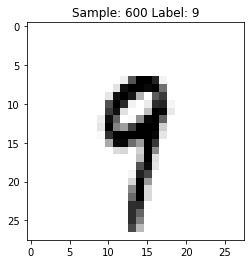

In [34]:
# Visualise training images
def displayImage(number):
  # Check one hot array of image label
  print(trainLabels[number])
  # Convert label bact to 0-9
  label = trainLabels[number].argmax(axis=0)
  # Reshape 1D tensor (768 pixels) into 28*28 image
  image = trainImages[number].reshape([28,28])
  # Show image
  plt.title('Sample: %d Label: %d' % (number, label))
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.show()

displayImage(600)

In [35]:
# Build the model
model = Sequential()
# 32 kernels size 3*3. Kernel is a filter used to extract features from an image
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=inputShape))
model.add(Conv2D(64,(3,3),activation='relu'))
# Reduce 2*2 pixel block to a single pixel, represents max pixel found
model.add(MaxPool2D(pool_size=(2,2)))
# Reduce neurons to prevent overfitting
model.add(Dropout(0.25))
# Flatten result to 1D to pass to final layer
model.add(Flatten())
# Hidden layer for learning
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
# Classify from 0-9 with softmax
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [36]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.fit(trainImages,trainLabels,batch_size=32,epochs=10,verbose=2,validation_data=(testImages,testLabels))

Epoch 1/10
1875/1875 - 5s - loss: 0.1958 - accuracy: 0.9415 - val_loss: 0.0433 - val_accuracy: 0.9864
Epoch 2/10
1875/1875 - 5s - loss: 0.0837 - accuracy: 0.9759 - val_loss: 0.0379 - val_accuracy: 0.9869
Epoch 3/10
1875/1875 - 5s - loss: 0.0624 - accuracy: 0.9810 - val_loss: 0.0287 - val_accuracy: 0.9895
Epoch 4/10
1875/1875 - 5s - loss: 0.0509 - accuracy: 0.9843 - val_loss: 0.0277 - val_accuracy: 0.9917
Epoch 5/10
1875/1875 - 5s - loss: 0.0423 - accuracy: 0.9873 - val_loss: 0.0345 - val_accuracy: 0.9891
Epoch 6/10
1875/1875 - 5s - loss: 0.0358 - accuracy: 0.9892 - val_loss: 0.0233 - val_accuracy: 0.9926
Epoch 7/10
1875/1875 - 5s - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0298 - val_accuracy: 0.9914
Epoch 8/10
1875/1875 - 5s - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0293 - val_accuracy: 0.9917
Epoch 9/10
1875/1875 - 5s - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0301 - val_accuracy: 0.9920
Epoch 10/10
1875/1875 - 5s - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0390 - 

In [38]:
# Check the accuracy and loss
accuracyScoring = model.evaluate(testImages,testLabels,verbose=0)
print('Test Loss: ',accuracyScoring[0])
print('Test Accuracy: ',accuracyScoring[1])

Test Loss:  0.03896612301468849
Test Accuracy:  0.9907000064849854


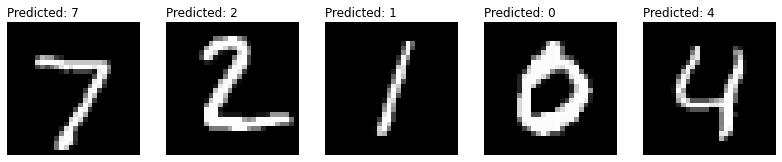

In [39]:
# Sample 5 images to test accuracy
predict = model.predict(testImages)

plt.figure(figsize=(28,28))

for image in range(5):
  subplot = plt.subplot(2,10, image+1)
  plt.imshow(testImages[image,:,:,0],cmap='gray')
  original = testLabels[image]
  predicted = np.argmax(predict[image])
  plt.title("Predicted: {}".format(predicted), loc='left')    
  plt.axis('off') 
plt.show()

In [40]:
model.save('model.h5')